# 1. Get Classification Results

In [1]:
import pandas as pd

actual_class = [1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
Prob1 = [0.996, 0.218, 0.038, 0.998, 0.622, 0.471, 0.848, 0.707, 0.984, 0.656,
         0.889, 0.337, 0.948, 0.149, 0.98, 0.199, 0.506, 0.048, 0.681, 0.762]

df = pd.DataFrame({'actual class': actual_class,
              'Prob of 1': Prob1})

df

,actual class,Prob of 1
0,1,0.996
1,1,0.218
2,0,0.038
3,1,0.998
4,0,0.622
5,0,0.471
6,1,0.848
7,1,0.707
8,1,0.984
9,1,0.656


# 2. Classification

In [2]:
cutoff = 0.5

In [3]:
pred = []

for i in df.index:
  if df['Prob of 1'][i] > cutoff:
    pred.append(1)
  else:
    pred.append(0)

pred

[1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1]

In [4]:
df['pred'] = pred

In [5]:
df

,actual class,Prob of 1,pred
0,1,0.996,1
1,1,0.218,0
2,0,0.038,0
3,1,0.998,1
4,0,0.622,1
5,0,0.471,0
6,1,0.848,1
7,1,0.707,1
8,1,0.984,1
9,1,0.656,1


In [6]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_true=df['actual class'], y_pred=df['pred'])
acc

0.85

# 3. Confusion Matrix

In [7]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=df['actual class'], y_pred=df['pred'])
cm = pd.DataFrame(cm, columns=['pred0','pred1'])
cm.index = ['real0','real1']
cm

,pred0,pred1
real0,6,2
real1,1,11


# 4. Cutoff Table

In [8]:
df = df.sort_values(by=['Prob of 1'], ascending=False)
df

,actual class,Prob of 1,pred
3,1,0.998,1
0,1,0.996,1
8,1,0.984,1
14,1,0.980,1
12,1,0.948,1
10,1,0.889,1
6,1,0.848,1
19,0,0.762,1
7,1,0.707,1
18,1,0.681,1


In [9]:
cutoffset = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

In [10]:
def prediction(cutoff, df):
  pred = []
  for i in df.index:
    if df['Prob of 1'][i] > cutoff:
      pred.append(1)
    else:
      pred.append(0)

  return pred

In [11]:
cutoff_acc = []

for cutoff in cutoffset:
  df['pred'] = prediction(cutoff,df)
  acc = accuracy_score(y_true=df['actual class'], y_pred=df['pred'])
  cutoff_acc.append(acc)

cutoff_acc

[0.7, 0.8, 0.75, 0.8, 0.85, 0.8, 0.75, 0.75, 0.65, 0.4]

In [12]:
df_cutoff = pd.DataFrame({'cutoff':cutoffset,'acc':cutoff_acc})
df_cutoff

,cutoff,acc
0,0.1,0.70
1,0.2,0.80
2,0.3,0.75
3,0.4,0.80
4,0.5,0.85
5,0.6,0.80
6,0.7,0.75
7,0.8,0.75
8,0.9,0.65
9,1.0,0.40


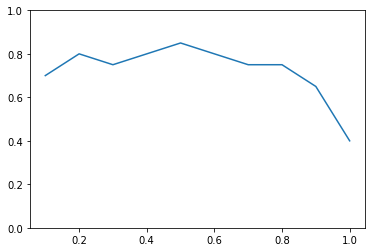

In [13]:
import matplotlib.pyplot as plt

plt.plot(df_cutoff['cutoff'], df_cutoff['acc'])
plt.ylim(0,1)
plt.show()

In [14]:
import numpy as np

best_cutoff_pos = np.argmax(df_cutoff['acc'])
best_cutoff = df_cutoff['cutoff'][best_cutoff_pos]
print('Best Cut Off Is ',best_cutoff)

Best Cut Off Is  0.5


#5. Lift & Decile Chart with Library dmba

https://pypi.org/project/dmba/
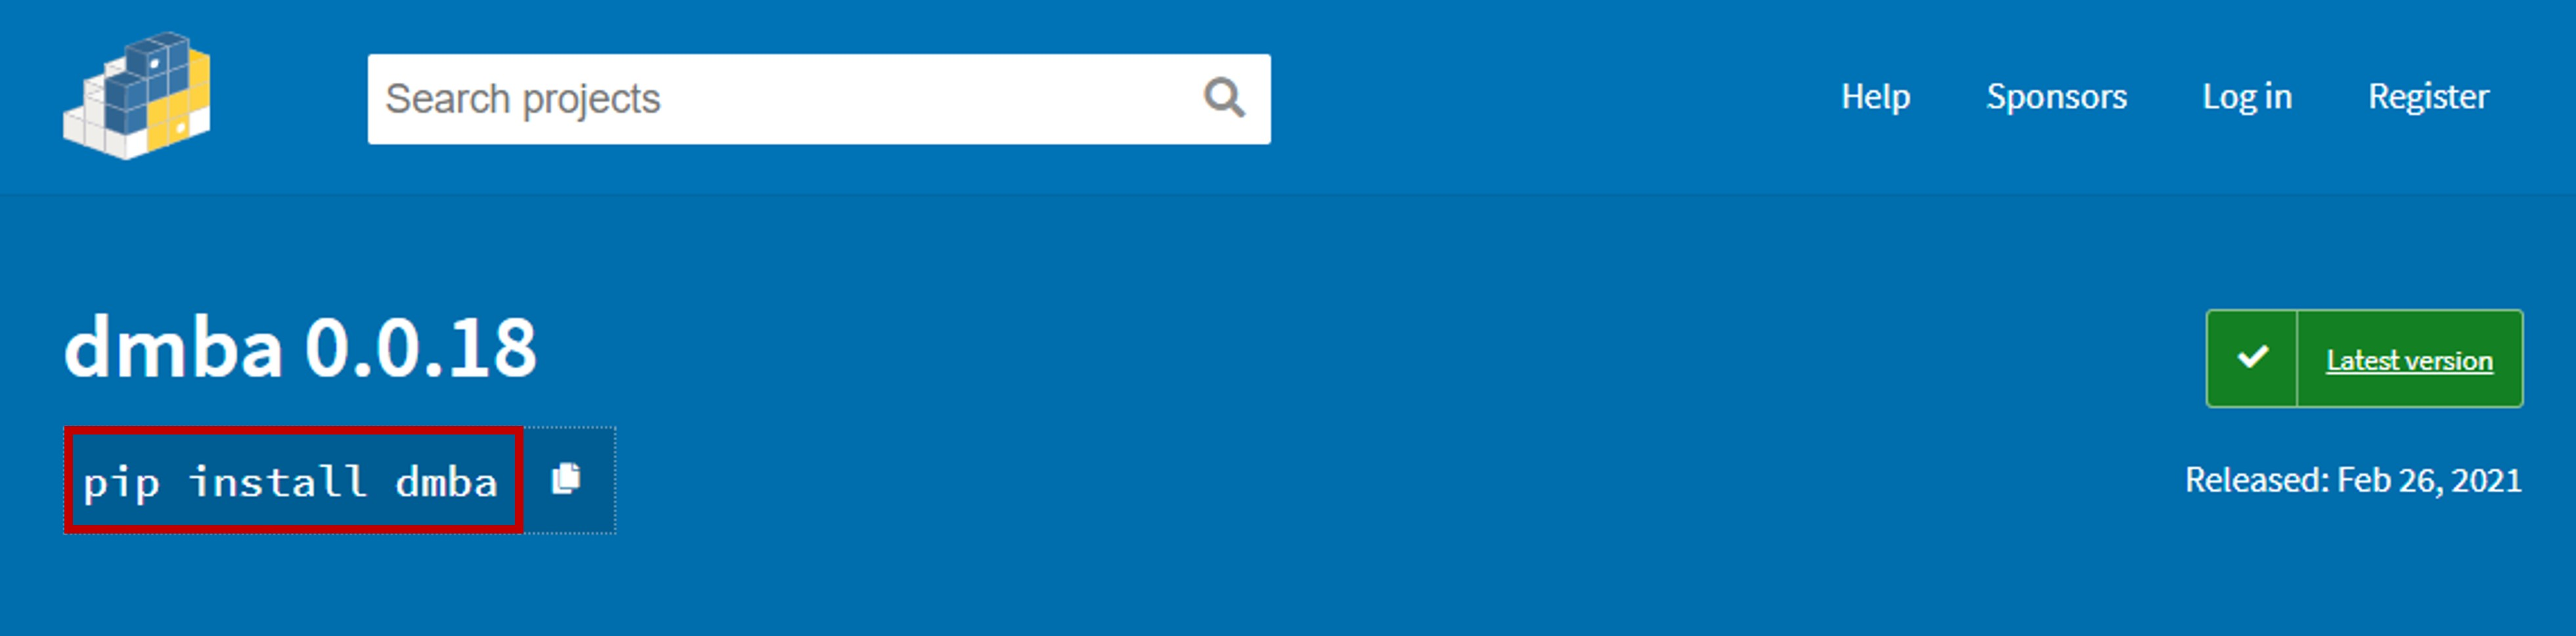

In [15]:
! pip install dmba

In [16]:
from dmba import liftChart, gainsChart

no display found. Using non-interactive Agg backend


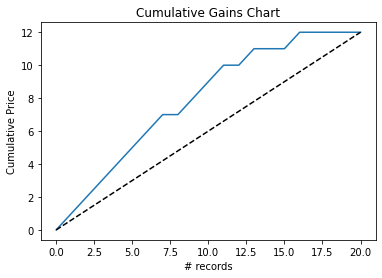

In [17]:
ax = gainsChart(df['actual class'])
ax.set_ylabel('Cumulative Price')
ax.set_title('Cumulative Gains Chart')

plt.show()

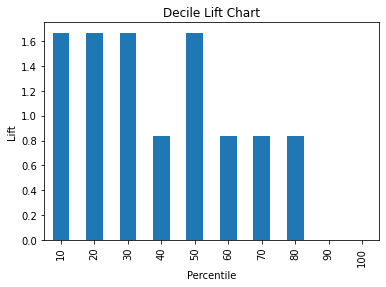

In [18]:
ax = liftChart(df['actual class'], labelBars=False)
ax.set_ylabel('Lift')

plt.show()